# In this assignment we learn about numerical stabiity of the covariance matrix, fitting $\chi^2$ distributions, to correct for the Hartlap factor.

## For this assignment no external packages are required. You just need a running conda environment, where numpy and matplotlib are installed.

In [28]:
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy.linalg import inv, eigvals
from scipy.special import gamma, factorial
from scipy.optimize import curve_fit
from scipy.stats import chi2 as chi2_scp

## Preparation: load in the data we need for this assignment.

In [3]:
model=np.load('data_4_assignment1/reference_model.npy') # This will be our reference model
cov=np.load('data_4_assignment1/covariance.npy') # This is the analytical covariance matrix, which we assume is the true covariance of the data

print('The dimension of the Model: ', model.shape)
print('The dimenstion of the Cov. Matrix: ', cov.shape)


The dimension of the Model:  (900,)
The dimenstion of the Cov. Matrix:  (900, 900)


## Task 1: Create two sets of 10000 noisy Gaussian data vectors each using the provided reference model and true covariance matrix. 

In [4]:
noisy_data_set1 = np.random.multivariate_normal(mean=model, cov=cov, size=10000)
noisy_data_set2 = np.random.multivariate_normal(mean=model, cov=cov, size=10000)

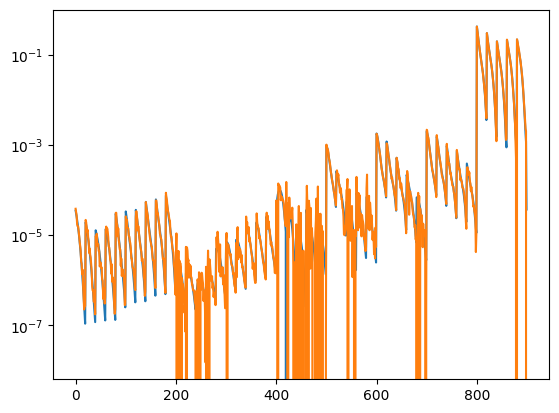

In [5]:
# What is the values we see in model?
'''
First 20 points is w(p) in the 1,1 tomographic bin. The next 20 is int he 1,2 tomographic bin. etc.
'''

plt.plot(model)
plt.plot(noisy_data_set1[0])
plt.yscale('log')

Text(0.5, 1.0, 'Residuals')

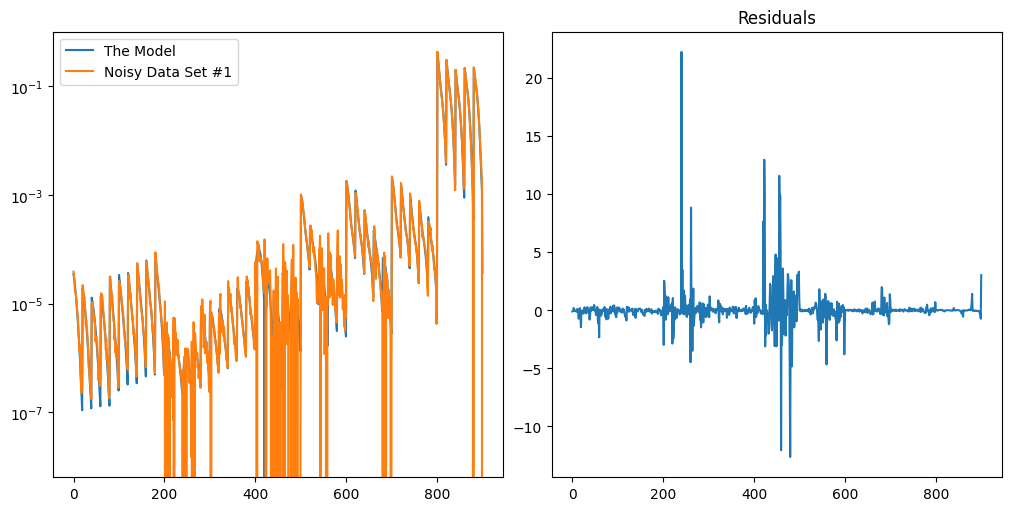

In [6]:
# check that the noisy data vector scatter around the truth

fig = plt.figure(constrained_layout=True, figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax_residuals = fig.add_subplot(1, 2, 2)
    
    
ax.plot(model, label='The Model' )
ax.plot(noisy_data_set1[0], label='Noisy Data Set #1')
ax.set_yscale('log')
ax.legend(loc='best')

residuals = (model-noisy_data_set1[0])/model
ax_residuals.plot(residuals)
ax_residuals.set_title('Residuals')


## Task 2: 
#### Use the provided covariance matrix and the model as a reference.
### 2.1: Test if set 1 follows a $\chi^2$ distribution with the correct degrees of freedom, by measuring its mean and variance. 
### 2.2: Convince yourself, that the measured $\chi^2$ follows a $\chi^2$ distribution.

In [12]:
inv_cov = inv(cov)
chi2_dataset1 = []
chi2_dataset2 = []

# compute the chi^2 for all dv for noisy data set1
for i in range(len(noisy_data_set1)):
    differnce = model-noisy_data_set1[i]
    chi2_val = differnce.T @ inv_cov @ differnce
    
    chi2_dataset1.append(chi2_val)
    
# compute the chi^2 for all dv for noisy data set2
for i in range(len(noisy_data_set2)):
    differnce = model-noisy_data_set2[i]
    chi2_val = differnce.T @ inv_cov @ differnce
    
    chi2_dataset2.append(chi2_val)

Mean for Dataset 1:  899.5884457396878
Variance for Dataset 1:  1818.4146039078407
---------------------------------------------
Mean for Dataset 2:  900.7933301205848
Variance for Dataset 2:  1859.5216441155198


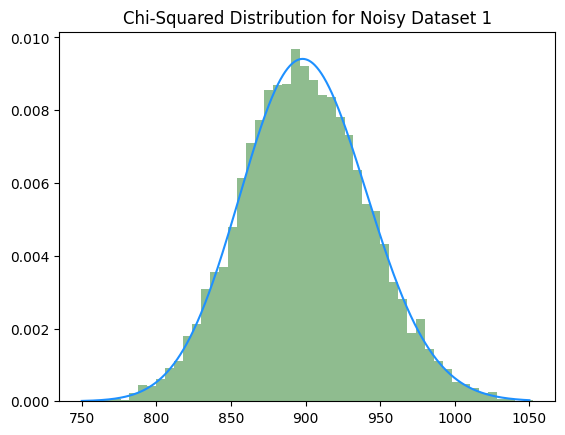

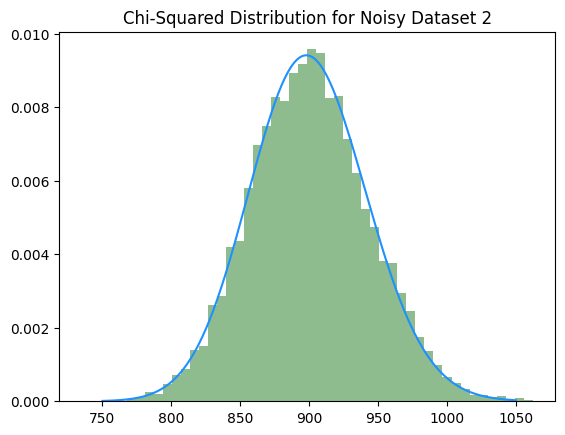

In [13]:
# What should the mean and variance should be?
'''
For the chi-squared distribution the mean is 'k' which is the degrees of freedom. We expect this to be 900.
The variance for the chi-squared distribution is '2k' which we expect to be 1800.
'''

# At high degress of freedom (k) the chi2-distribution tends to become a Gaussian

print('Mean for Dataset 1: ', np.mean(chi2_dataset1))
print('Variance for Dataset 1: ', np.var(chi2_dataset1))
print('---------------------------------------------')
print('Mean for Dataset 2: ', np.mean(chi2_dataset2))
print('Variance for Dataset 2: ', np.var(chi2_dataset2))

# is the overall distribution right?
x = np.linspace(750,1050,1000)
plt.plot( x, chi2_scp.pdf(x,900), color='dodgerblue')
plt.hist(chi2_dataset1, bins=50, density=True, color='darkseagreen')
plt.title('Chi-Squared Distribution for Noisy Dataset 1')
plt.show()

# is the overall distribution right?
x = np.linspace(750,1050,1000)
plt.plot( x, chi2_scp.pdf(x,900), color='dodgerblue')
plt.hist(chi2_dataset2, bins=50, density=True, color='darkseagreen')
plt.title('Chi-Squared Distribution for Noisy Dataset 2')
plt.show()




### After convincing us that the two sets actually follow a $\chi^2$ distribution, if we use the analytical covariance matrix, we want to check if that is also true if we measure the covariance matrix from simulations. 
### As running simulations is too expensive, we simulate measurements from simulations with the created set 2. 
### Task 3: As a preparation, please measure the numerical covariance matrix from [500,1000,5000,10000] data vectors from set 2. What do you observe in the correlation matrix? Are the covariances positive semi-definite?

In [16]:
cov_num500 = np.cov(noisy_data_set2[:500].T)
cov_num1000 = np.cov(noisy_data_set2[:1000].T)
cov_num5000 = np.cov(noisy_data_set2[:5000].T)
cov_num10000 = np.cov(noisy_data_set2[:10000].T)


In [17]:
print(cov_num500.shape, cov_num1000.shape, cov_num5000.shape, cov_num10000.shape)

(900, 900) (900, 900) (900, 900) (900, 900)


Checking the Covariances are positive semi-definite by checking whether there are any negative eigenvalues.

In [35]:
# Calculating the eigenvalues of the covariance matrices
eigenvals_500 = eigvals(cov_num500)
eigenvals_1000 = eigvals(cov_num1000)
eigenvals_5000 = eigvals(cov_num5000)
eigenvals_10000 = eigvals(cov_num10000)

# Checking if there are any negative eigenvalues 
print('Any negative eigenvalues for 500: ' + str(np.any(eigenvals_500<0)) )
print('Any negative eigenvalues for 1000: ' + str(np.any(eigenvals_1000<0)) )
print('Any negative eigenvalues for 5000: ' + str(np.any(eigenvals_5000<0)) )
print('Any negative eigenvalues for 10000: ' + str(np.any(eigenvals_10000<0)) )

print('')
print('This makes sense since we expect there to be negative eigenvalues in our covariance matrix when n < m.')

Any negative eigenvalues for 500: True
Any negative eigenvalues for 1000: False
Any negative eigenvalues for 5000: False
Any negative eigenvalues for 10000: False

This makes sense since we expect there to be negative eigenvalues in our covariance matrix when n < m.


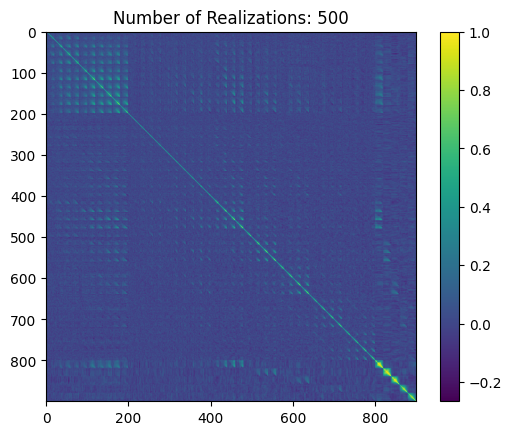

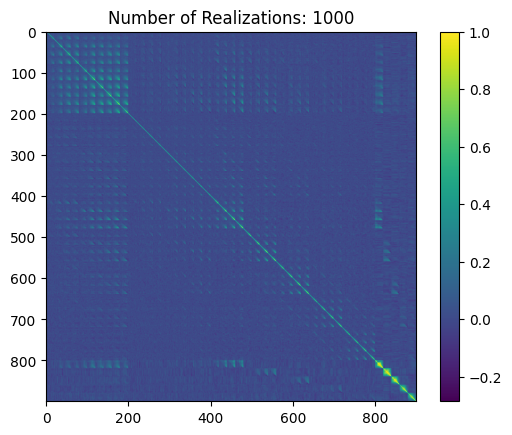

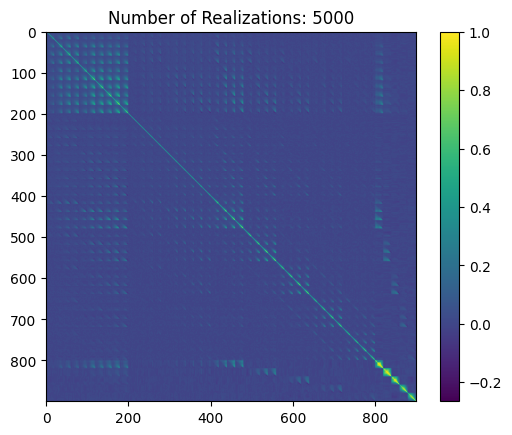

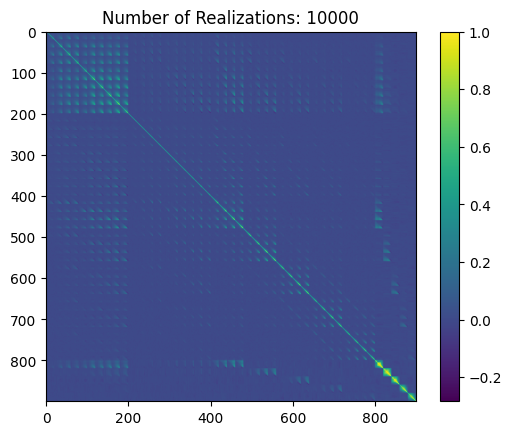

In [26]:
cov_matrices = [cov_num500, cov_num1000, cov_num5000, cov_num10000]
titles = [500,1000,5000,10000]

for cov, numofrealize in zip(cov_matrices,titles):
    
    plt.imshow( cov/np.outer( np.sqrt(np.diag(cov)), np.sqrt(np.diag(cov)) ) )
    plt.colorbar()
    plt.title('Number of Realizations: ' + str(numofrealize))
    plt.show()



What do I observe?

- From first glance of all 4 covaraince matices appear to be very similar looking
- For all 4, all of them have a clear diagonal with covariance ~1
- For all 4

### Task 4: Test for all four covariance matrices if you recover a $\chi^2$ distribution with the mean and variance. What do you observe? 

In [44]:
print( np.cov(noisy_data_set2.T).shape )
print(cov_num500.shape)


(900, 900)
(900, 900)


The mean is: 3821205646846881.0
The variance is: 1.601287846830957e+34


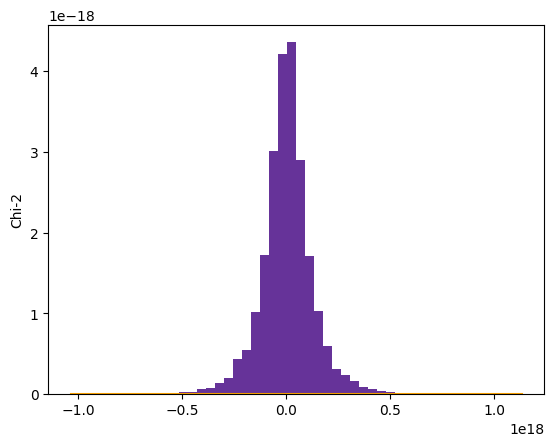

The mean is: 9474.20377457138
The variance is: 2156447.569445459


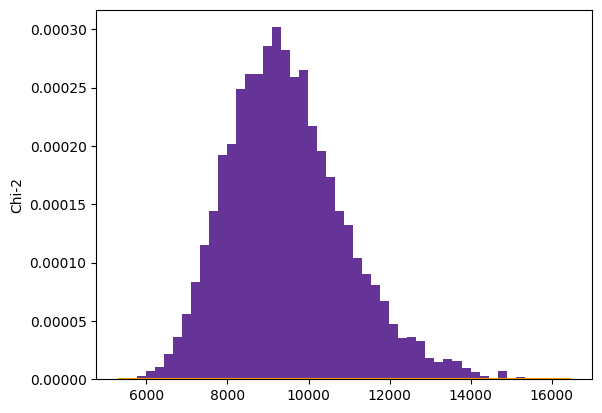

The mean is: 1095.8071260443692
The variance is: 3262.3350871377256


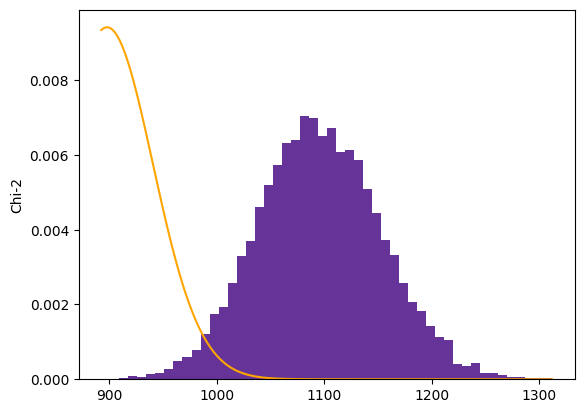

The mean is: 987.1452644083629
The variance is: 2401.1306125054984


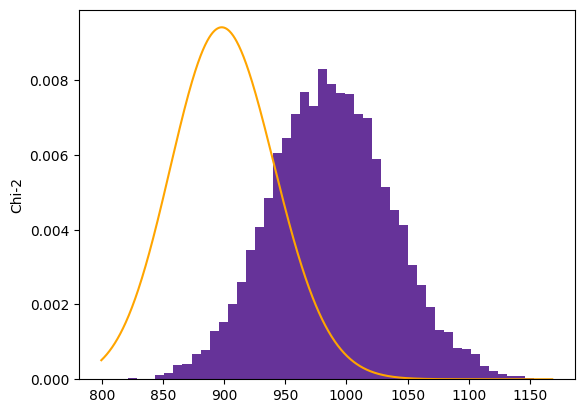

In [82]:
cov_matrices = [cov_num500, cov_num1000, cov_num5000, cov_num10000]

def compute_chi2(covariace_matrix):
    chi2_vals = []
    
    inv_cov = inv(covariace_matrix)
    
    for i in range(len(noisy_data_set1)):
        difference = model - noisy_data_set1[i]
        chi2_val = difference.T @ inv_cov @ difference
        chi2_vals.append(chi2_val)
        
    return(chi2_vals)
    
#x = np.linspace(750,1050,1000)

def plot_chi2_distributions(chi2_vals, covariace_matrix):
    
    print("The mean is: " + str(np.mean(chi2_vals)))
    print("The variance is: " + str(np.var(chi2_vals)))
    
    _, bins, _ = plt.hist(compute_chi2(covariace_matrix), bins=50, density=True, color='rebeccapurple')
    x = np.linspace( min(bins), max(bins),1000)
    
    plt.plot( x, chi2_scp.pdf(x,900), color='orange')
    plt.ylabel('Chi-2')
    plt.show()


plot_chi2_distributions( compute_chi2(cov_num500), cov_num500)
plot_chi2_distributions( compute_chi2(cov_num1000), cov_num1000 )
plot_chi2_distributions( compute_chi2(cov_num5000), cov_num5000)
plot_chi2_distributions( compute_chi2(cov_num10000), cov_num10000)


#comment your result

#Do it for the covariance matrices




### Task 5: Repeat the same exercise from before, but debias your inverse covriance matrix with the so-called Hartlap factor. What do you observe?

In [ ]:


n_r = # number of realisations used
n_d = # diemension of the model 
h = (n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num500)/h

#.... plot and check mean and variance



### Task 6: Repeat task 5 again, but this time, test if set 2 also follows a $\chi^2$ distribution. What do you observe?

In [ ]:


n_r = 500
n_d = len(model)
h=(n_r-1)/(n_r-n_d-2)

inv_cov = inv(cov_num500)/h
chi2 = []
for i in range(10000):
    ...
    # use set 2 to compute the chi2
    
# what is happening in comparison to the taak before?




### Bonus Task 1: Create a new set of 10000 noisy data vectors using the numerical covariance matrix measured from 1000 noisy data vectors. Is it possible to reduce the noise in the covariance matrix with this method? Test if set 1 follows a $\chi^2$ distribution which the newly created covaraince matrix. What do you observe?

In [ ]:
noisy_data_set3=np.random.multivariate_normal(...)
cov_num10000_set3 = np.cov(...)



### Bonus task 2: What is the minimum number of data vectors such that the inverse covariance matrix is non-singular? What is an easy tool to test this? Is an analytical covariance matrix always invertible? What can you do if it is not invertible? 